# Running Grad-Cam

Grad-Cam (Gradient-weighted Class Activation Mapping) coming from this [paper](https://arxiv.org/pdf/1610.02391.pdf) and provided by this [repository](https://github.com/jacobgil/pytorch-grad-cam) is a well known XAI algorithm and was created for testing on the Resnet50 and VGG19 pretrained networks.

It gives us a tool to examine which specific aspects of the image had an impact on the overall model's choice of a given label. It is very helpful when examining samples that were incorrectly categorised. The Grad-CAM method is fairly understandable and quite easy to use.

This notebook provides an example of how to utilize and use this algorithm in torch

### Import packages

In [1]:
import torch
from torchvision.models import resnet50, vgg19
from torchvision import datasets
from torchvision.io.image import read_image
import os
import sys
import logging 
logging.basicConfig(level=logging.INFO)
from typing import Dict, List


module_path = os.path.abspath(os.path.join("../../"))
if module_path not in sys.path:
    sys.path.append(module_path)
    os.chdir(module_path)

from utils.data_utils import load_conf, transform_image, root_load_and_transform_image
from model_algorithms import grad_cam


### Initialize the pretrained models

In [8]:
resnet50_model = resnet50(weights="ResNet50_Weights.DEFAULT").eval()
vgg19_model = vgg19(weights="VGG19_Weights.DEFAULT").eval()

### Read the image

In [3]:
img = read_image("examples/00_quick_start/data/Elephant/matthew-spiteri-WfZ4WCuNtlg-unsplash.jpg")

### Transform the image to the needed tensor for the models

In [4]:
input_tensor = transform_image(img, load_conf())

### Check the models' layers

Based on what we want to achieve (in which level to observe), we can select for the CAM the corresponding layers of the model that we want to check.
Each model has it's own layers, so a simple visualisation of the model's architecture is required in order to choose the appropriate layers.

If the target_layer is None, it will use the last layer of the model. We can chose more layer names and include them in a list in order to make visualisation for all of them.

In [8]:
print(resnet50_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
print(vgg19_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

Each one of the models has a different architecture, with different layers and layers' names

### GradCam

Running GradCam for the 2 different models:
 - For the resnet50 model, we run the GradCam for it's last layer (considered automatically, because None is given) and also we run GradCam aggregated for the 3 layers: "layer2", "layer3", "layer4".
 - For the vgg19 model, we run the GradCam for each one of the features' layers separeted 

##### Resnet50

The cams per target layer are:  [torch.Size([1, 7, 7])]


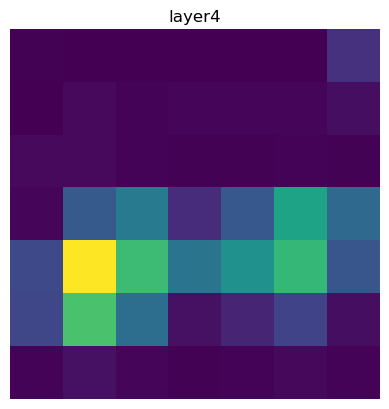

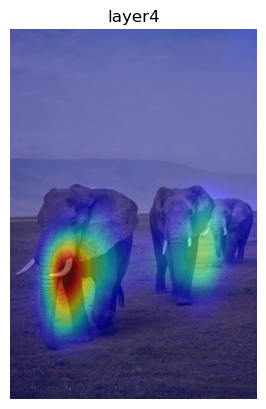

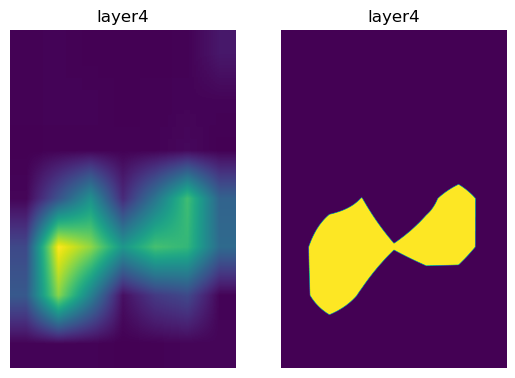

The cams per target layer are:  [torch.Size([1, 28, 28]), torch.Size([1, 14, 14]), torch.Size([1, 7, 7])]


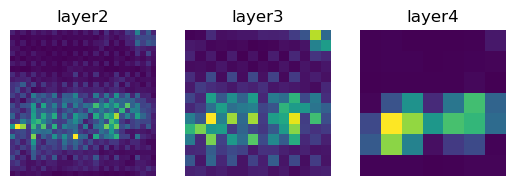

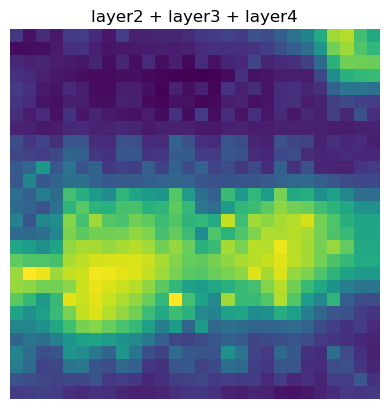

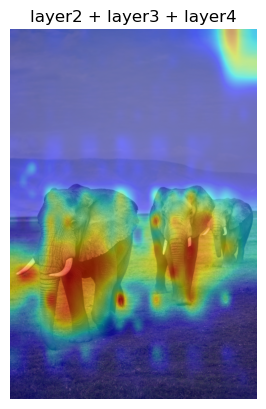

In [6]:
grad_cam.extract_cam(img, input_tensor, resnet50_model, multiple_layers=["layer2", "layer3", "layer4"])

##### VGG19 model

Let's visualise the features layers

In [14]:
vgg19_model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

The cams per target layer are:  [torch.Size([1, 224, 224]), torch.Size([1, 224, 224]), torch.Size([1, 224, 224]), torch.Size([1, 224, 224]), torch.Size([1, 112, 112]), torch.Size([1, 112, 112]), torch.Size([1, 112, 112]), torch.Size([1, 112, 112]), torch.Size([1, 112, 112]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 56, 56]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 14, 14]), torch.Size([1, 14, 14]), torch.Size([1, 14, 14]), torch.Size([1, 14, 14]), torch.Size([1, 14, 14]), torch.Size([1, 14, 14]), torch.Size([1, 14, 14]), torch.Size([1, 14, 14])]


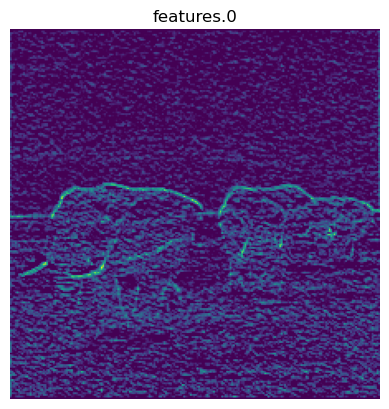

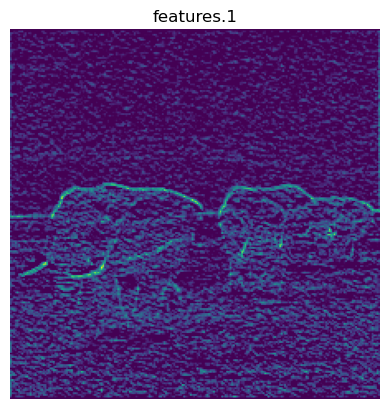

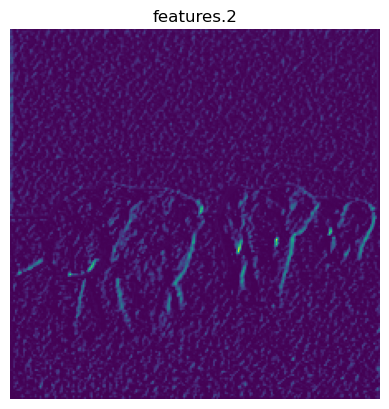

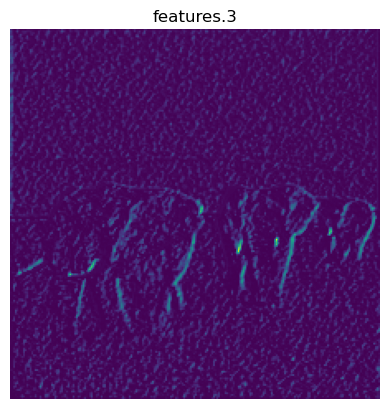

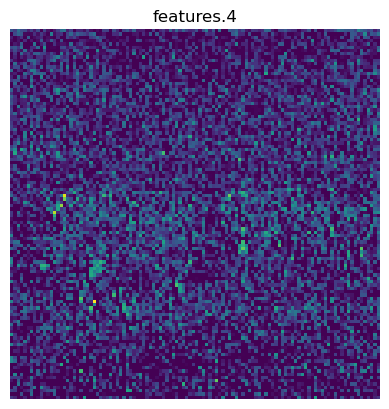

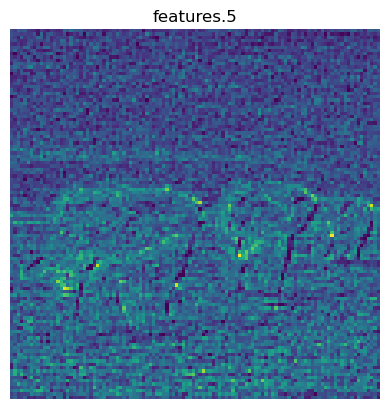

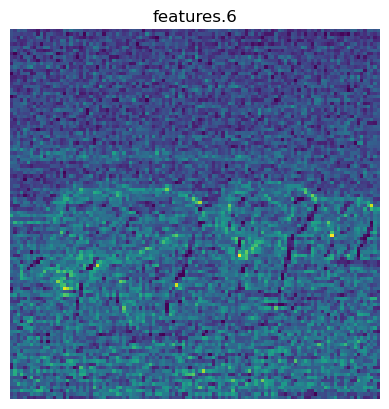

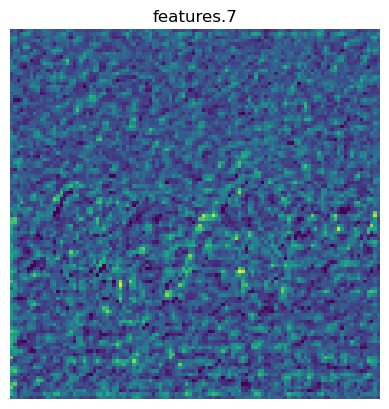

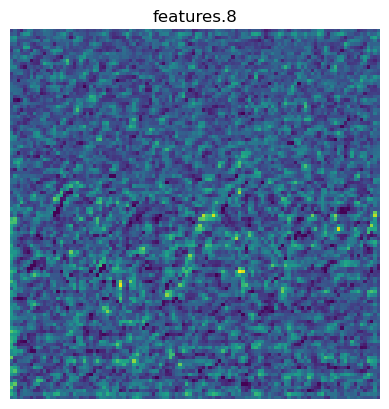

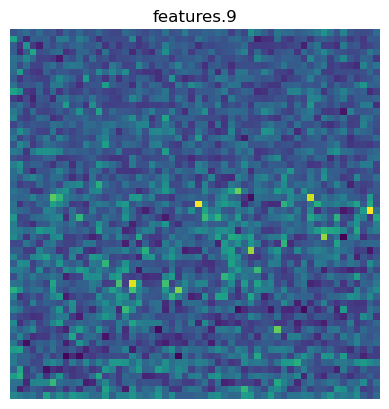

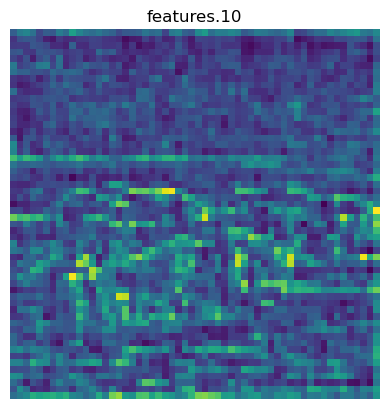

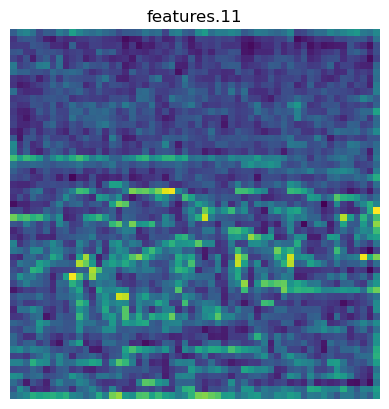

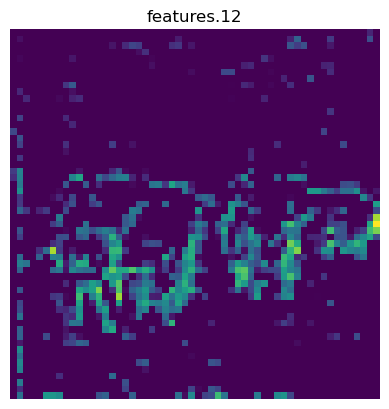

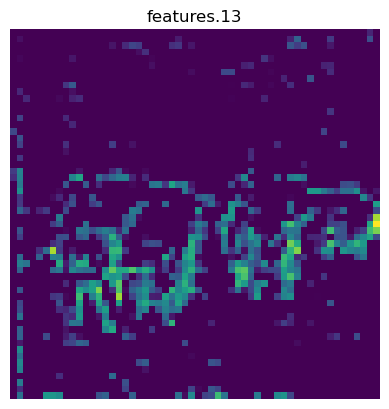

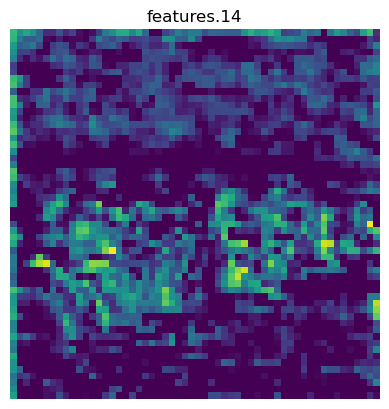

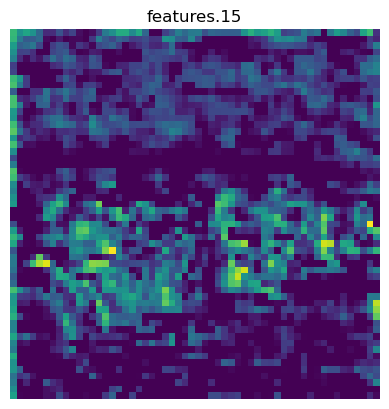

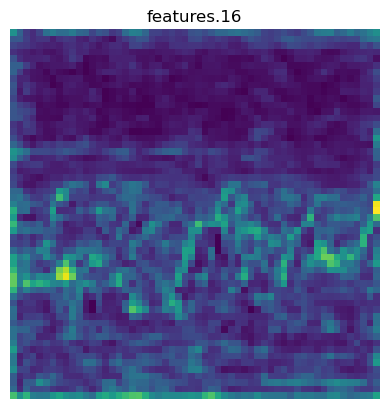

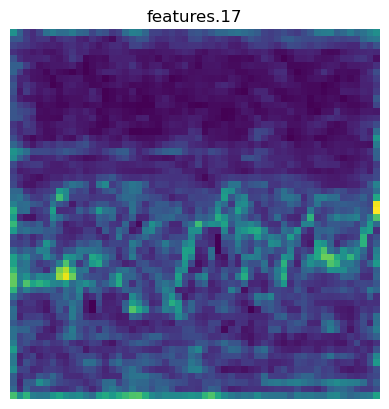

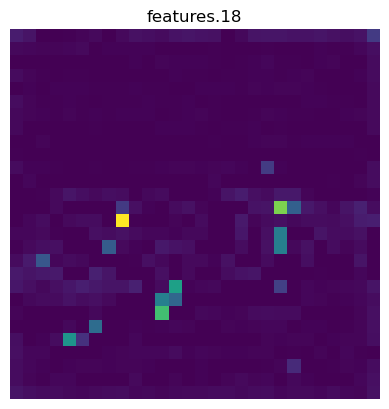

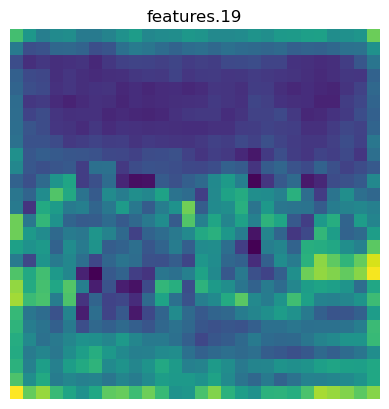

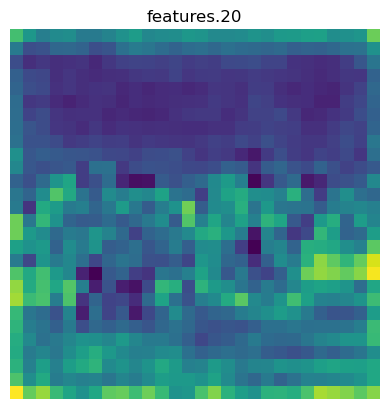

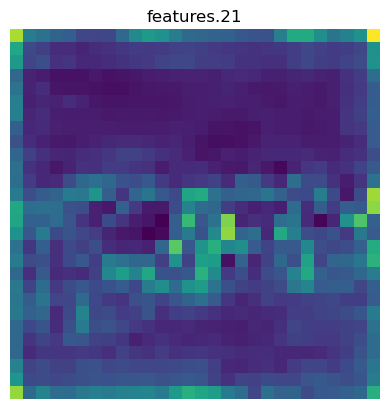

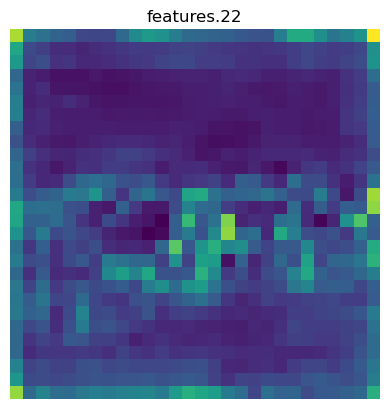

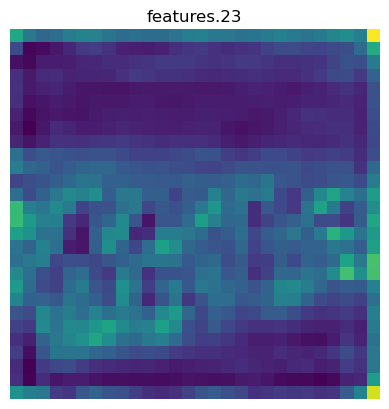

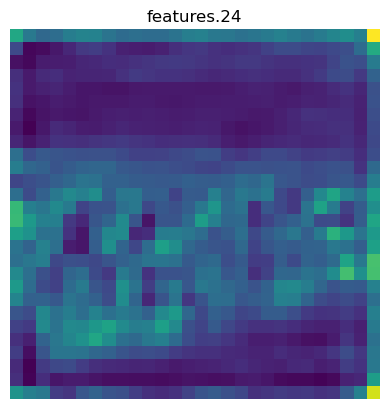

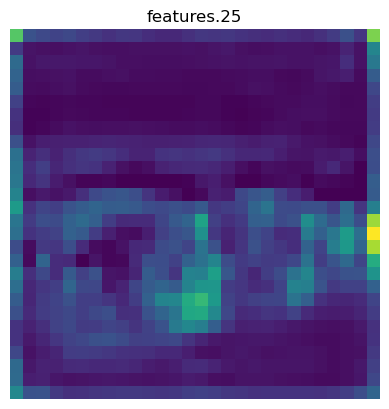

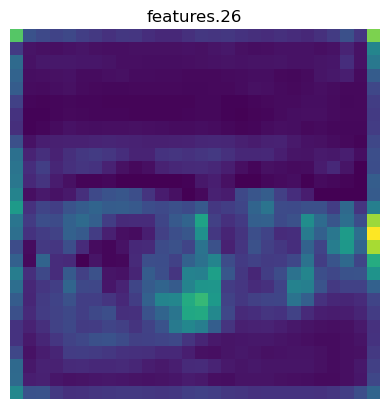

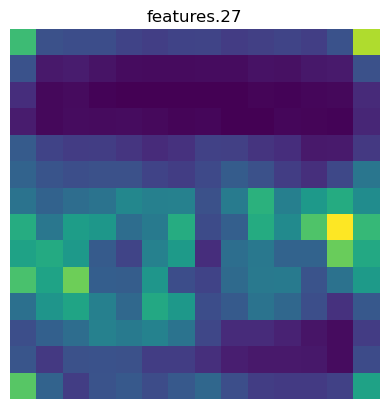

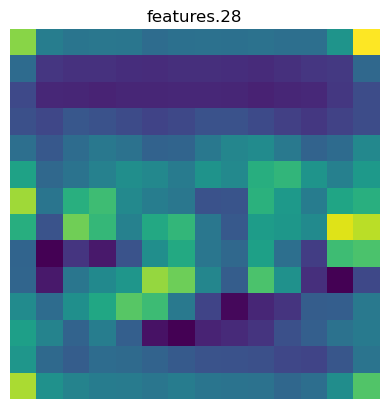

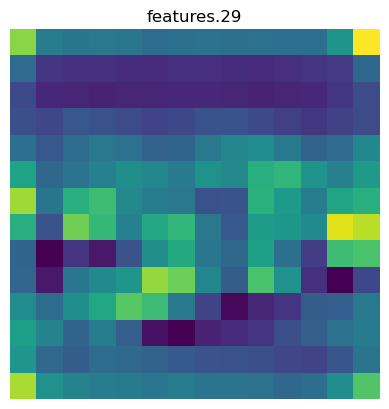

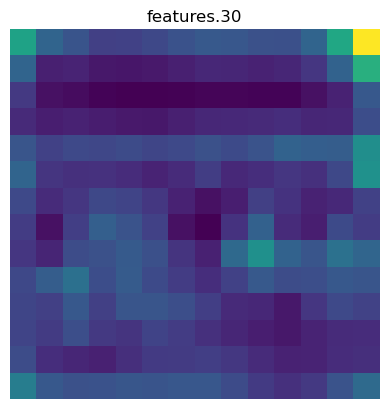

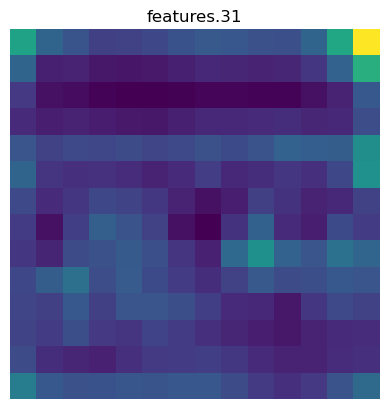

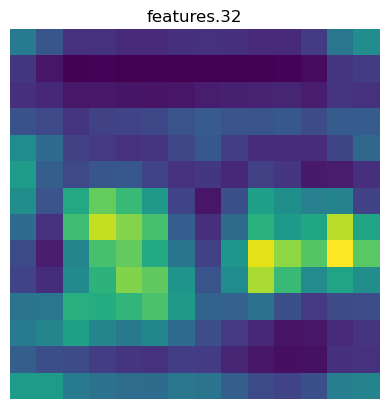

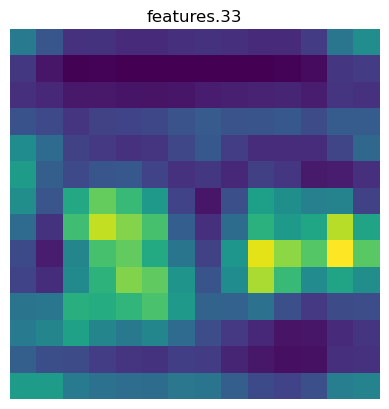

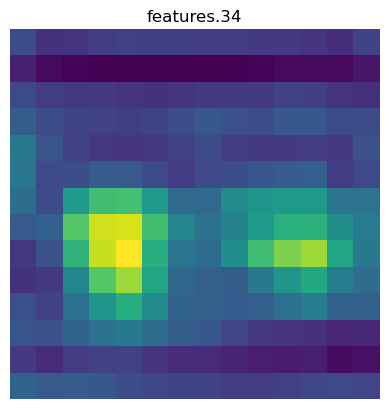

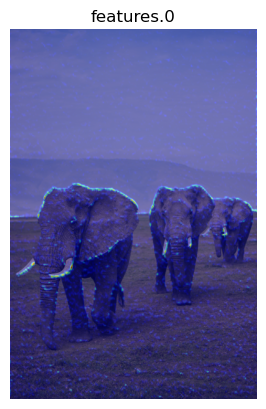

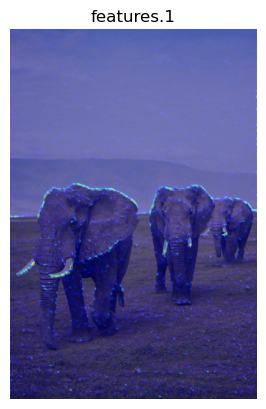

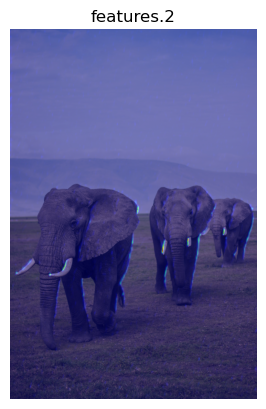

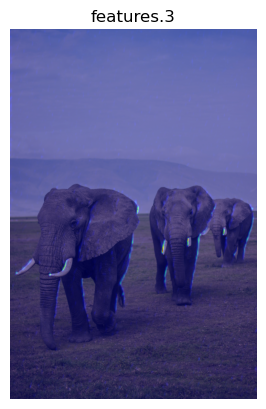

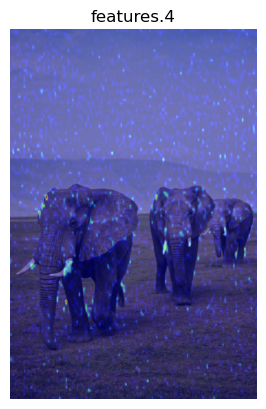

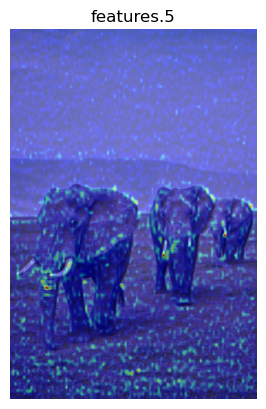

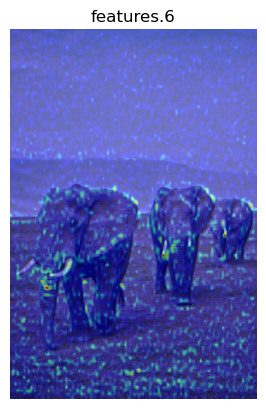

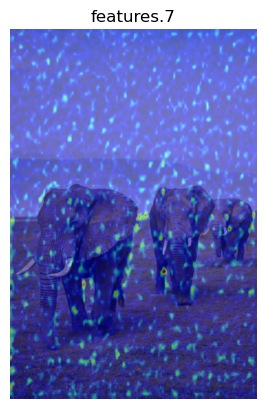

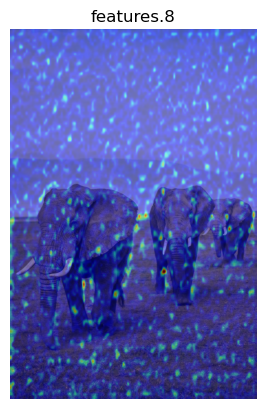

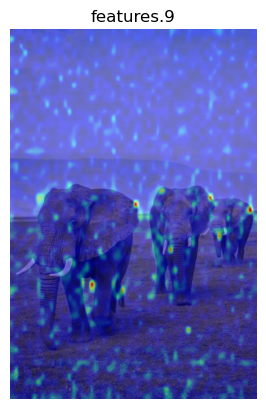

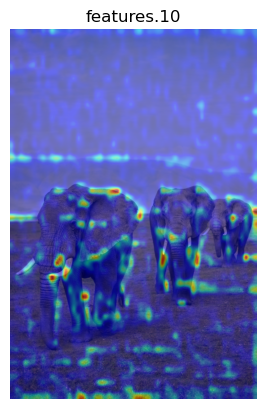

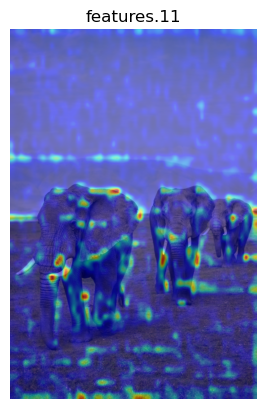

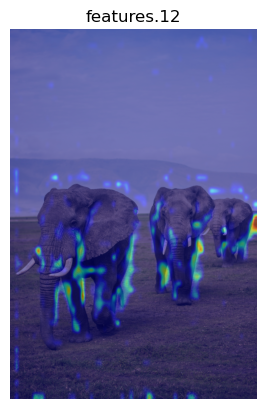

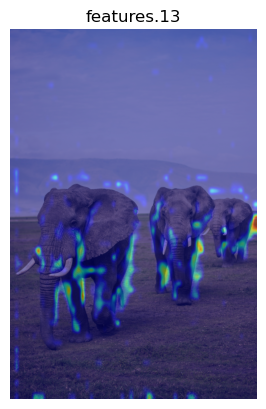

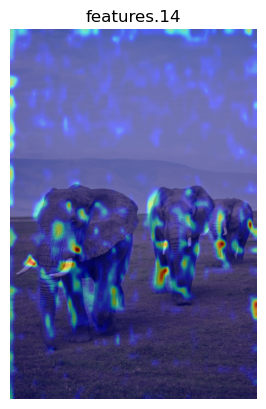

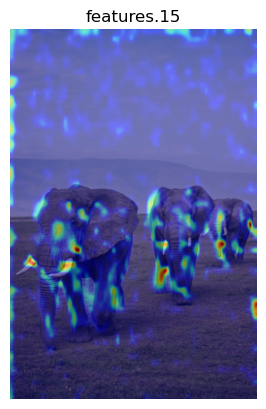

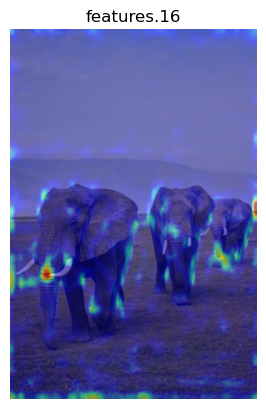

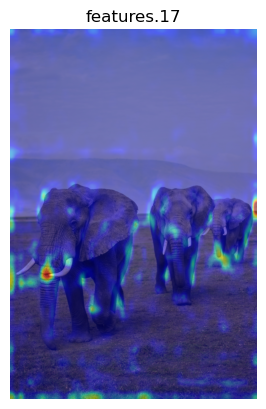

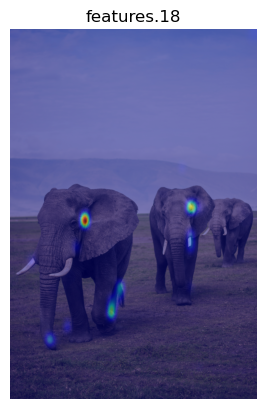

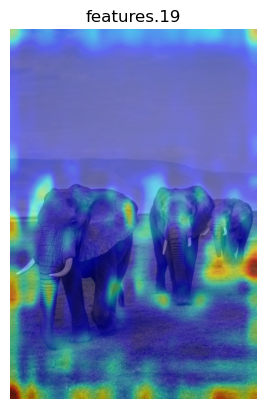

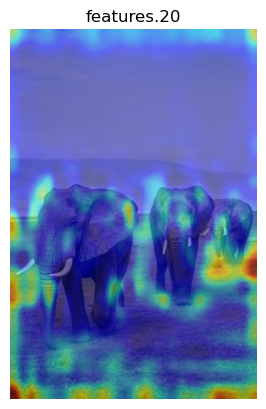

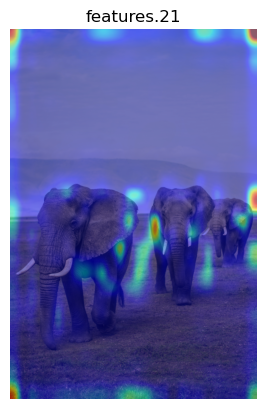

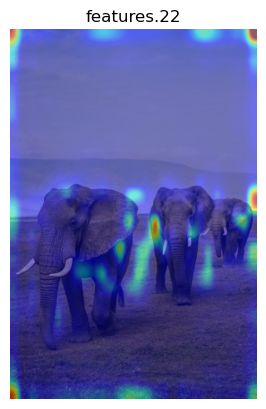

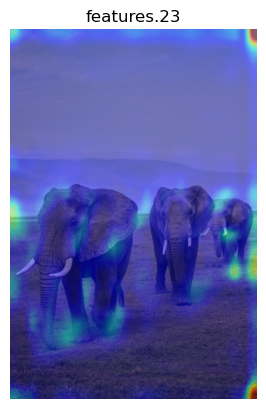

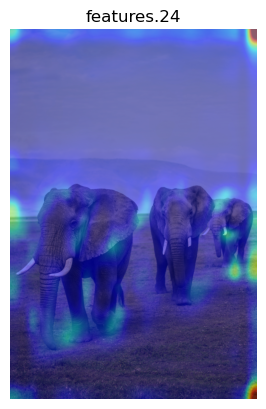

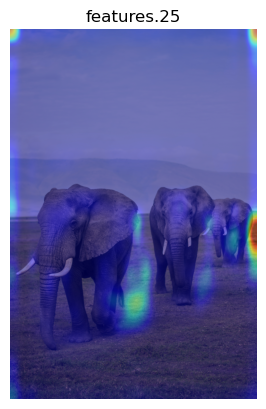

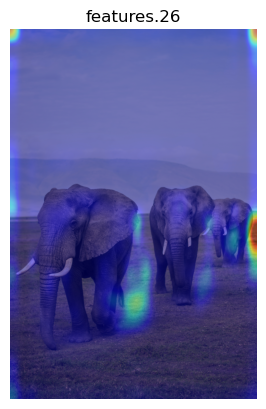

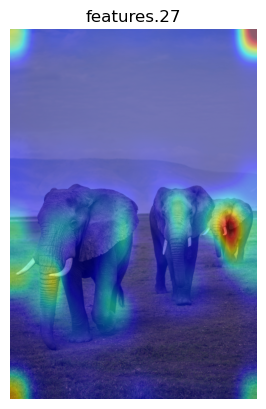

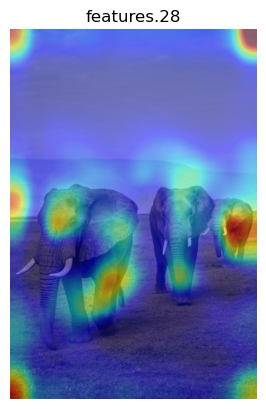

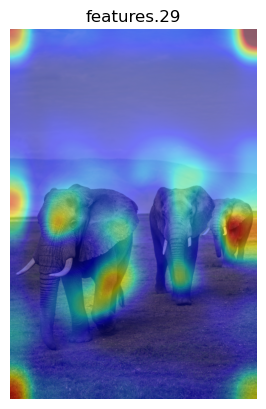

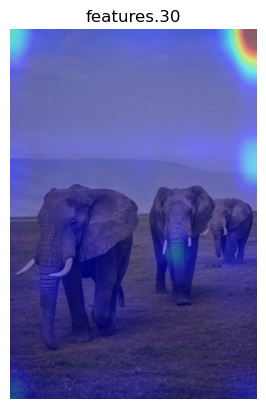

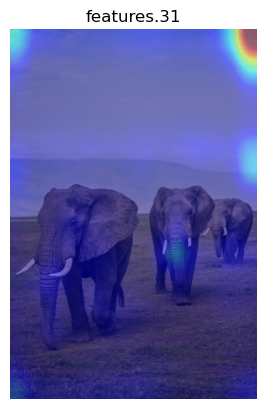

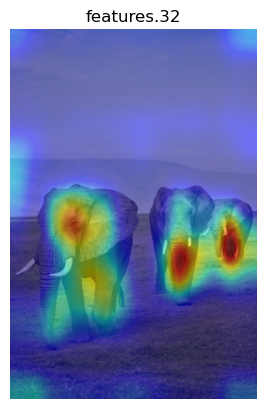

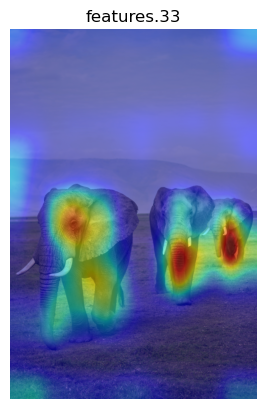

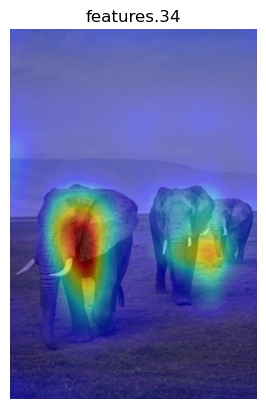

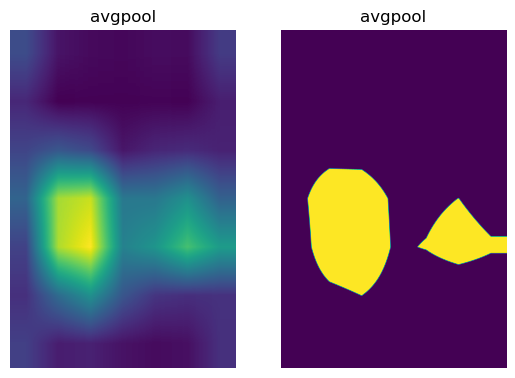

In [16]:
# Keep the features layers until the last CNN layer
features = []
features = [vgg19_model.features[x] for x in range(35)]

# Give as input all the gathered features layers
grad_cam.extract_cam(img, input_tensor, vgg19_model, target_layer=features)